# <center> Logistic Regression

## <center> Case-Study- Predict potential Loan Customers

<img src="https://s3.ap-south-1.amazonaws.com/img1.creditmantri.com/community/article/home-loan-charges-that-every-home-loan-applicant-should-be-aware-of.jpg" >

# <center> Problem Description

We have data from Zenith bank that has a growing customer base. A bank has 2 types of customers :1. Liability Cutomers : Those who have deposits with the bank 2. Asset Customers    : Those who have a loan with the bank
    
For Zenith bank, the majority of customers are liability customers currently (depositors). They are struggling with lower ratio of borrowers (Assets). To address this problem, they are going to run a huge camapign with a lot of Marketing Spend to increase the borrowers. This is where Machine Learning can help. The request is to provide them with a ML model that can guide them on which customers to target so that their spends are efficiently utilised. 


As a Data scientist, we have to build a model for Zenith Bank that will ease the task of marketing department by predicting most likely borrowers</p>
  
    
Main Objective of this exercise : To understand Logistic regression and explore this algorithm using Sklearn, Statmodel, and related concepts like Roc-Auc Curve, Coefficients, Feature Selection etc

**Questions to be answered-**
* Which customers will borrow a loan?
* From the given data, which features are most significant in determining above.


# <center> Importing Libraries & Data

In [1289]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)

from IPython.display import display


In [1290]:
original_data=pd.read_csv('zenith_bank_customer_loans.csv')
customer_data=original_data.copy()
print("We have {0} rows and {1} columns in our data".format(customer_data.shape[0],customer_data.shape[1]))

We have 5000 rows and 14 columns in our data


In [1291]:
customer_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#  Data Dictionary

    
* ID: Unique ID of Customer
* Age: Age of the Customer
* Experience: Years of experience
* Income: Annual income `(in $1000)`
* ZIP Code: ZIP code of residence
* Family: Count of family members
* CCAvg: Avg Monthly Spending on Credit Card `(in $1000)`
* Education: 1- Undergrad; 2- Graduate;3- Advanced/Professional # can be used as education_Score
* Mortgage: House Mortgage (in $1000)
* Personal_Loan: Flag indicating whether customer opted for loan previously or not ( 1 - Opted for loan)
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Flag indicating whether the customer has a certificate of deposit (CD) account with the bank
* Online: Flag indicating whether the customer use internet banking facilities
* CreditCard: Flag indicating whether the customer use a credit card issued by any other Bank (excluding Zenith Bank)?

In [1292]:
customer_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# <center> Preprocessing Data

## Basic Data Check

***checking for missing values***

In [1293]:
customer_data.isna().sum().sum()

0

**Number of unique values in each column**

It can help us in detemiming categorical/continous features

In [1294]:
customer_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [1295]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [1296]:
customer_data.sample(15)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1691,1692,56,32,48,94117,1,1.60,3,0,0,0,0,0,1
3149,3150,49,25,25,95192,4,1.00,1,0,0,0,0,1,1
601,602,58,32,38,91320,1,1.40,1,0,0,0,0,1,1
3659,3660,33,7,22,94002,1,0.40,2,0,0,0,0,0,0
243,244,65,39,170,90095,3,7.90,3,99,1,0,1,1,0
2844,2845,60,34,64,95014,3,2.20,3,0,0,0,0,0,0
3703,3704,67,41,78,94301,4,2.40,3,0,0,1,0,0,0
4227,4228,32,7,111,90277,1,3.80,1,0,0,1,0,0,0
3312,3313,47,22,190,94550,2,8.80,1,0,0,0,0,0,0
1425,1426,64,38,40,91330,1,2.50,3,94,0,0,0,1,1


In [1297]:
# dropping Id

In [1298]:
customer_data.drop('ID',axis=1,inplace=True)

### Renaming columns

Removing whitespaces

In [1299]:
customer_data.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan",
                               "Securities Account":"SecuritiesAccount",
                               "CD Account":'CDAccount'},inplace=True)

### Preprocessing zipcode

using zipcode library to map zipcodes to countries.

In [1300]:
customer_data.ZIPCode.nunique()

467

In [1301]:
#intallling zipcode library

!pip install zipcodes

In [1302]:
# list of unique zipcodes
zipcodes=customer_data.ZIPCode.unique()

In [1303]:
zipcodes[:5]

array([91107, 90089, 94720, 94112, 91330], dtype=int64)

In [1304]:
import zipcodes as zcode
zip_dict={}

for i in zipcodes:
    city_country=zcode.matching(i.astype('str'))
    
    if len(city_country)==1:
        country=city_country[0].get('county')
        
    else:
        country=i
    
    zip_dict.update({i:country})

In [1309]:
zip_dict

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [1311]:
import numbers

l1=list(zip_dict.values())
[i for i in l1 if isinstance(i, numbers.Number)]

[92717, 9307, 92634, 96651]

In [1312]:
# our mapping was able to map all the zipcodes except - [92717, 9307, 92634, 96651]
# as these are only few, we can fix them mannualy taking refrences from the internet

In [1313]:
zip_dict.update({92717:'Orange County'})
zip_dict.update({92634:'Orange County'})
zip_dict.update({96651:'Orange County'})
zip_dict.update({9307:'Orange County'})


In [1314]:
# we can map countries and add to the origial data

In [1315]:
customer_data['country']=customer_data.ZIPCode.map(zip_dict)

In [1316]:
customer_data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,country
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [1317]:
customer_data.country.nunique()

38

In [1318]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  country            5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [1319]:
# some of the categorical varibles are stored as int64 which takes lot of space.
# changing thier datatype to categories instead

In [1320]:
customer_data.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [1321]:
# minimum_values of experience is -ve which seems incorrect

In [1322]:
# categorical variables like Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,ZIPCode,Family

In [1323]:
cat_features=['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','country']
customer_data[cat_features]=customer_data[cat_features].astype('category')

In [1324]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  country            5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


In [1325]:
# we can see tha he memory usage has been decreased from 547 to 266.4

**Handling experience**

In [714]:
customer_data[customer_data['Experience']<0].head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,country
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1,San Mateo County
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0,Santa Clara County
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0,Orange County
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0,San Francisco County
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0,Santa Barbara County


In [715]:
customer_data[customer_data['Experience']<0].Age.describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

So there are 52 instances of -ve experience , having age from 23-29.

In [716]:
customer_data.groupby(['Age','Education'])['Experience'].describe()

count       mean       std   min    25%   50%    75%   max
Age Education                                                            
23  1            7.0  -1.285714  0.755929  -3.0  -1.00  -1.0  -1.00  -1.0
    2            5.0  -2.200000  0.447214  -3.0  -2.00  -2.0  -2.00  -2.0
24  1           13.0  -0.692308  0.947331  -2.0  -2.00   0.0   0.00   0.0
    2            8.0  -0.875000  0.640870  -2.0  -1.00  -1.0  -0.75   0.0
    3            7.0  -2.000000  1.000000  -3.0  -2.50  -2.0  -2.00   0.0
25  1           23.0   0.521739  0.790257  -1.0   0.00   1.0   1.00   1.0
    2           11.0  -0.272727  0.646670  -1.0  -1.00   0.0   0.00   1.0
    3           19.0  -0.526316  0.696692  -2.0  -1.00  -1.0   0.00   1.0
26  1           30.0   1.433333  0.817200   0.0   1.00   2.0   2.00   2.0
    2           24.0   0.750000  0.846990  -1.0   0.00   1.0   1.00   2.0
    3           24.0   0.583333  0.717282   0.0   0.00   0.0   1.00   2.0
27  1           39.0   2.461538  0.755546   1.0   2.00   3.0   3.00   3.0
    2           24.0   1.666667  1.049500   0.0   1.00   1.5   3.00   3.0
    3           28.0   1.392857  0.994030   0.0   1.00   1.0   2.00   3.0
28  1           47.0   3.255319  0.765225   2.0   3.00   3.0   4.00   4.0
    2           34.0   2.911765  0.933149   1.0   2.00   3.0   4.00   4.0
    3           22.0   2.409091  1.181568  -2.0   2.00   2.5   3.00   4.0
29  1           50.0   4.080000  0.899887   3.0   3.00   4.0   5.00   5.0
    2           38.0   3.789474  1.118829   2.0   3.00   4.0   5.00   5.0
    3           35.0   3.114286  1.622841  -1.0   3.00   3.0   4.00   5.0
30  1           53.0   5.018868  0.865816   4.0   4.00   5.0   6.00   6.0
    2           48.0   4.645833  1.020838   3.0   4.00   5.0   5.25   6.0
    3           35.0   4.914286  1.172514   0.0   4.00   5.0   6.00   6.0
31  1           51.0   5.882353  0.840168   5.0   5.00   6.0   7.00   7.0
    2           41.0   5.512195  1.098225   4.0   5.00   5.0   7.00   7.0
    3           33.0   5.090909  1.958374   1.0   5.00   5.0   7.00   7.0
32  1           60.0   6.950000  0.768556   6.0   6.00   7.0   8.00   8.0
    2           34.0   6.941176  0.982920   5.0   6.00   7.0   8.00   8.0
    3           26.0   6.500000  1.606238   2.0   6.00   6.0   8.00   8.0
33  1           53.0   8.018868  0.771875   7.0   7.00   8.0   9.00   9.0
    2           34.0   7.617647  1.181029   6.0   7.00   7.0   9.00   9.0
    3           33.0   7.060606  1.935513   3.0   7.00   7.0   9.00   9.0
34  1           69.0   9.086957  0.799616   8.0   8.00   9.0  10.00  10.0
    2           32.0   9.031250  0.932716   7.0   8.00   9.0  10.00  10.0
    3           33.0   8.515152  1.325736   4.0   8.00   9.0   9.00  10.0
35  1           63.0   9.904762  0.776973   9.0   9.00  10.0  10.50  11.0
    2           51.0   9.490196  1.155380   8.0   9.00   9.0  11.00  11.0
    3           37.0   9.054054  2.094251   5.0   9.00  10.0  10.00  11.0
36  1           47.0  11.127660  0.824015  10.0  10.00  11.0  12.00  12.0
    2           31.0  10.677419  1.165822   9.0  10.00  11.0  12.00  12.0
    3           29.0   9.793103  2.257991   6.0  10.00  11.0  11.00  12.0
37  1           35.0  11.942857  0.802308  11.0  11.00  12.0  13.00  13.0
    2           44.0  11.977273  0.976197  10.0  11.00  12.0  13.00  13.0
    3           27.0  11.407407  1.474378   7.0  11.00  12.0  12.00  13.0
38  1           44.0  13.136364  0.851562  12.0  12.00  13.0  14.00  14.0
    2           34.0  12.970588  0.999554  11.0  12.00  13.0  14.00  14.0
    3           37.0  12.432432  1.724666   8.0  12.00  13.0  13.00  14.0
39  1           55.0  14.254545  0.821430  13.0  14.00  14.0  15.00  15.0
    2           35.0  13.628571  1.002518  12.0  13.00  14.0  14.00  15.0
    3           43.0  13.255814  1.559808   9.0  13.00  13.0  14.00  15.0
40  1           57.0  15.228070  0.802174  14.0  15.00  15.0  16.00  16.0
    2           26.0  15.038462  0.999230  13.0  14.00  15.0  16.00  16.0
    3           42.

As per education & age it is evident that values are negative by mistake.Hence,
converting them into absolute values.

In [717]:
customer_data['Experience']=abs(customer_data['Experience'])

In [718]:
customer_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,1.937938,56.498800
std,11.463166,11.415189,46.033729,1.747659,101.713802
min,23.000000,0.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


# <center> EDA

### EDA| 5 Point summar

In [719]:
customer_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,1.937938,56.498800
std,11.463166,11.415189,46.033729,1.747659,101.713802
min,23.000000,0.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


* The experience seems to be fine noe,as minimum experience value is 0
* Age ranges from 23-67, and mean age is 45
* Income ranges from 8 grand to 224 grand , with mean at 73
* CCavg seems to be in between 0-10 grand,with avg customer spending $1.93.
* Mortgage range is 0-635 grand, while mean is around 56.

In [720]:
for i in cat_features:
    display(customer_data[i].value_counts(normalize=True)*100)

0    90.4
1     9.6
Name: PersonalLoan, dtype: float64

0    89.56
1    10.44
Name: SecuritiesAccount, dtype: float64

1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

0    93.96
1     6.04
Name: CDAccount, dtype: float64

1    59.68
0    40.32
Name: Online, dtype: float64

0    70.6
1    29.4
Name: CreditCard, dtype: float64

94720    3.38
94305    2.54
95616    2.32
90095    1.42
93106    1.14
         ... 
94087    0.02
90813    0.02
94404    0.02
90068    0.02
9307     0.02
Name: ZIPCode, Length: 467, dtype: float64

1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

Los Angeles County        21.90
San Diego County          11.36
Santa Clara County        11.26
Alameda County            10.00
Orange County              7.46
San Francisco County       5.14
San Mateo County           4.08
Sacramento County          3.68
Santa Barbara County       3.08
Yolo County                2.60
Monterey County            2.56
Ventura County             2.28
San Bernardino County      2.02
Contra Costa County        1.70
Santa Cruz County          1.36
Riverside County           1.12
Marin County               1.08
Kern County                1.08
Solano County              0.66
San Luis Obispo County     0.66
Humboldt County            0.64
Sonoma County              0.56
Fresno County              0.52
Placer County              0.48
Butte County               0.38
Shasta County              0.36
El Dorado County           0.34
Stanislaus County          0.30
San Benito County          0.28
San Joaquin County         0.26
Mendocino County           0.16
Siskiyou

22% customers belong to Los Angeles County.
only about 9.6% had borrowed loan previously.

In [721]:
customer_data.isna().sum().sum()

0

In [722]:
data=customer_data

In [723]:
data.isna().sum().sum()

0

## EDA| Univariate Analysis-continous variables

In [724]:
num_f =  ['Age','Experience','Income','CCAvg','Mortgage']

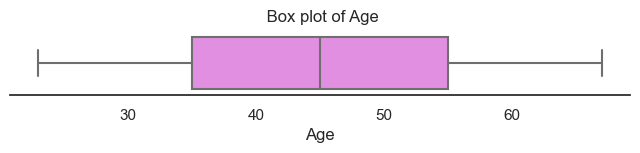

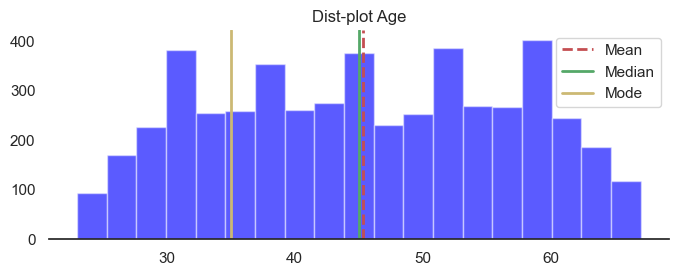

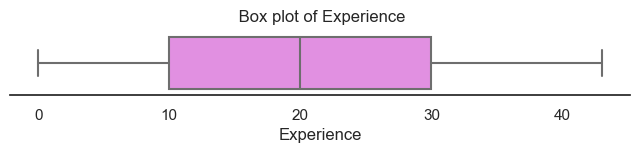

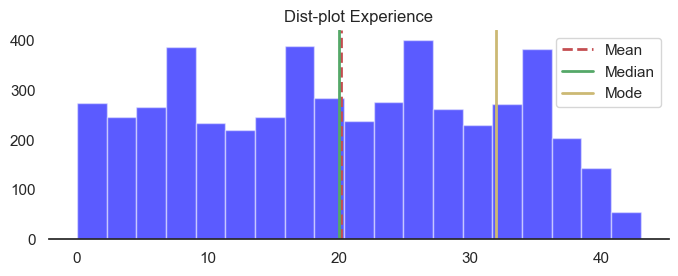

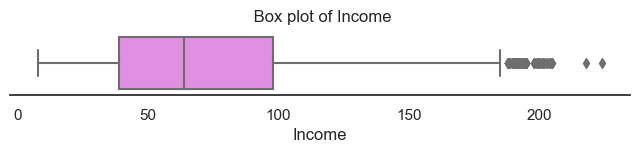

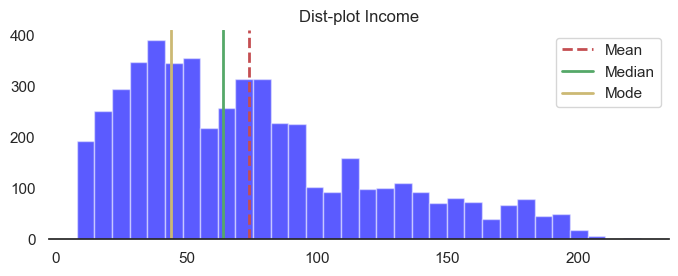

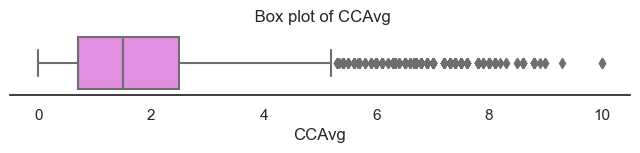

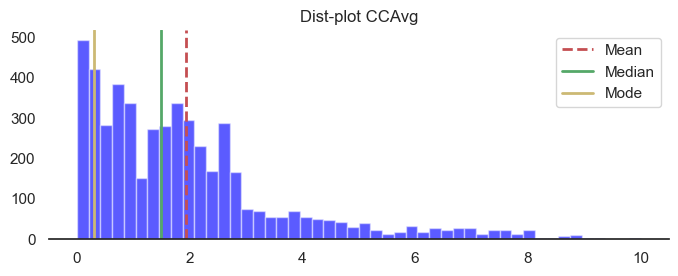

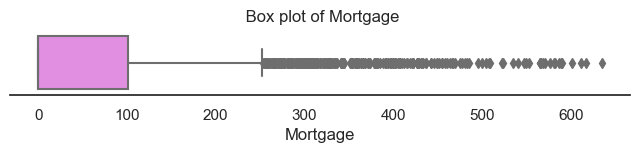

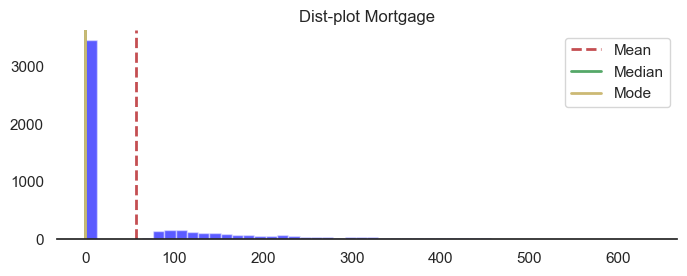

In [725]:
a=0
for i in num_f:
    sns.set_theme(style='white')
    plt.figure(figsize=(8,10))
    plt.subplot(len(num_f)*2,1,a+1)
    plt.title(" Box plot of " +i)
    sns.boxplot(x=data[i],orient='h',color='violet')
    sns.despine(top=True,right=True,left=True)
    plt.figure(figsize=(8,32))
    plt.subplot(len(num_f)*2,1,a+2)
    plt.title("Dist-plot "+ i)
    sns.distplot(x=data[i],kde=False,color='blue')
    ax_distplot=sns.distplot(x=data[i],kde=False,color='blue')
    sns.despine(top=True,right=True,left=True)
    a+=2
    
    mean=data[i].mean()
    median=data[i].median()
    mode=data[i].mode().tolist()[0]
    ax_distplot.axvline(mean, color='r', linestyle='--',linewidth=2)              
    ax_distplot.axvline(median, color='g', linestyle='-',linewidth=2)               
    ax_distplot.axvline(mode, color='y', linestyle='-',linewidth=2)
    
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
    


**Observations**

* Age and experience have similar distribution
* Income, Mortgage & CCAvg all are Righlt skewed
* Mortgage is 0 for a lot of customers

## EDA| Univariate Analysis- Categorical variables

In [635]:
num_f=data.columns[~data.columns.isin(num_f)]

In [728]:
num_f

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [729]:
data.Age.nunique()

45

In [730]:
data.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

since age has 45 unique values , to see a pattern it makes sense to conver them into bins

In [731]:
data['Age_bins']=pd.cut(data.Age,bins=[0,30,40,50,60,100],
                        labels=['18-30','31-40','41-50','51-60','61-100'])

In [732]:
data.Income.nunique()

162

In [733]:
data.Income.describe() 

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [734]:
data['Income_segment']=pd.cut(data.Income,bins=[0,50,150,250],
                            labels=["Lower",'Middle','High'])

In [735]:
data.CCAvg.nunique()

108

In [738]:
data.CCAvg.describe() 

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [743]:
data['Spending_segment']=pd.cut(data.CCAvg,bins=[0.00000, 0.70000, 2.50000, 10.00000],
                               labels=["Low", "Medium", "High"],include_lowest=True)

In [744]:
data.isna().sum().sum()

0

**Univariate Analysis-Categorical Variables(using countplot)**

In [653]:
plt.figure(figsize=(15,20))
sns.set_theme(style="white");

<Figure size 1500x2000 with 0 Axes>

In [654]:
data.country.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              373
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne

In [655]:
#we will analyze counties later on , as neither we can
# bin them nor are they sufficiently less to draw charts

In [656]:
cat_cols = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard',
               'Age_bins','Income_segment','Spending_segment']

In [657]:
sns.set_theme(style='white');

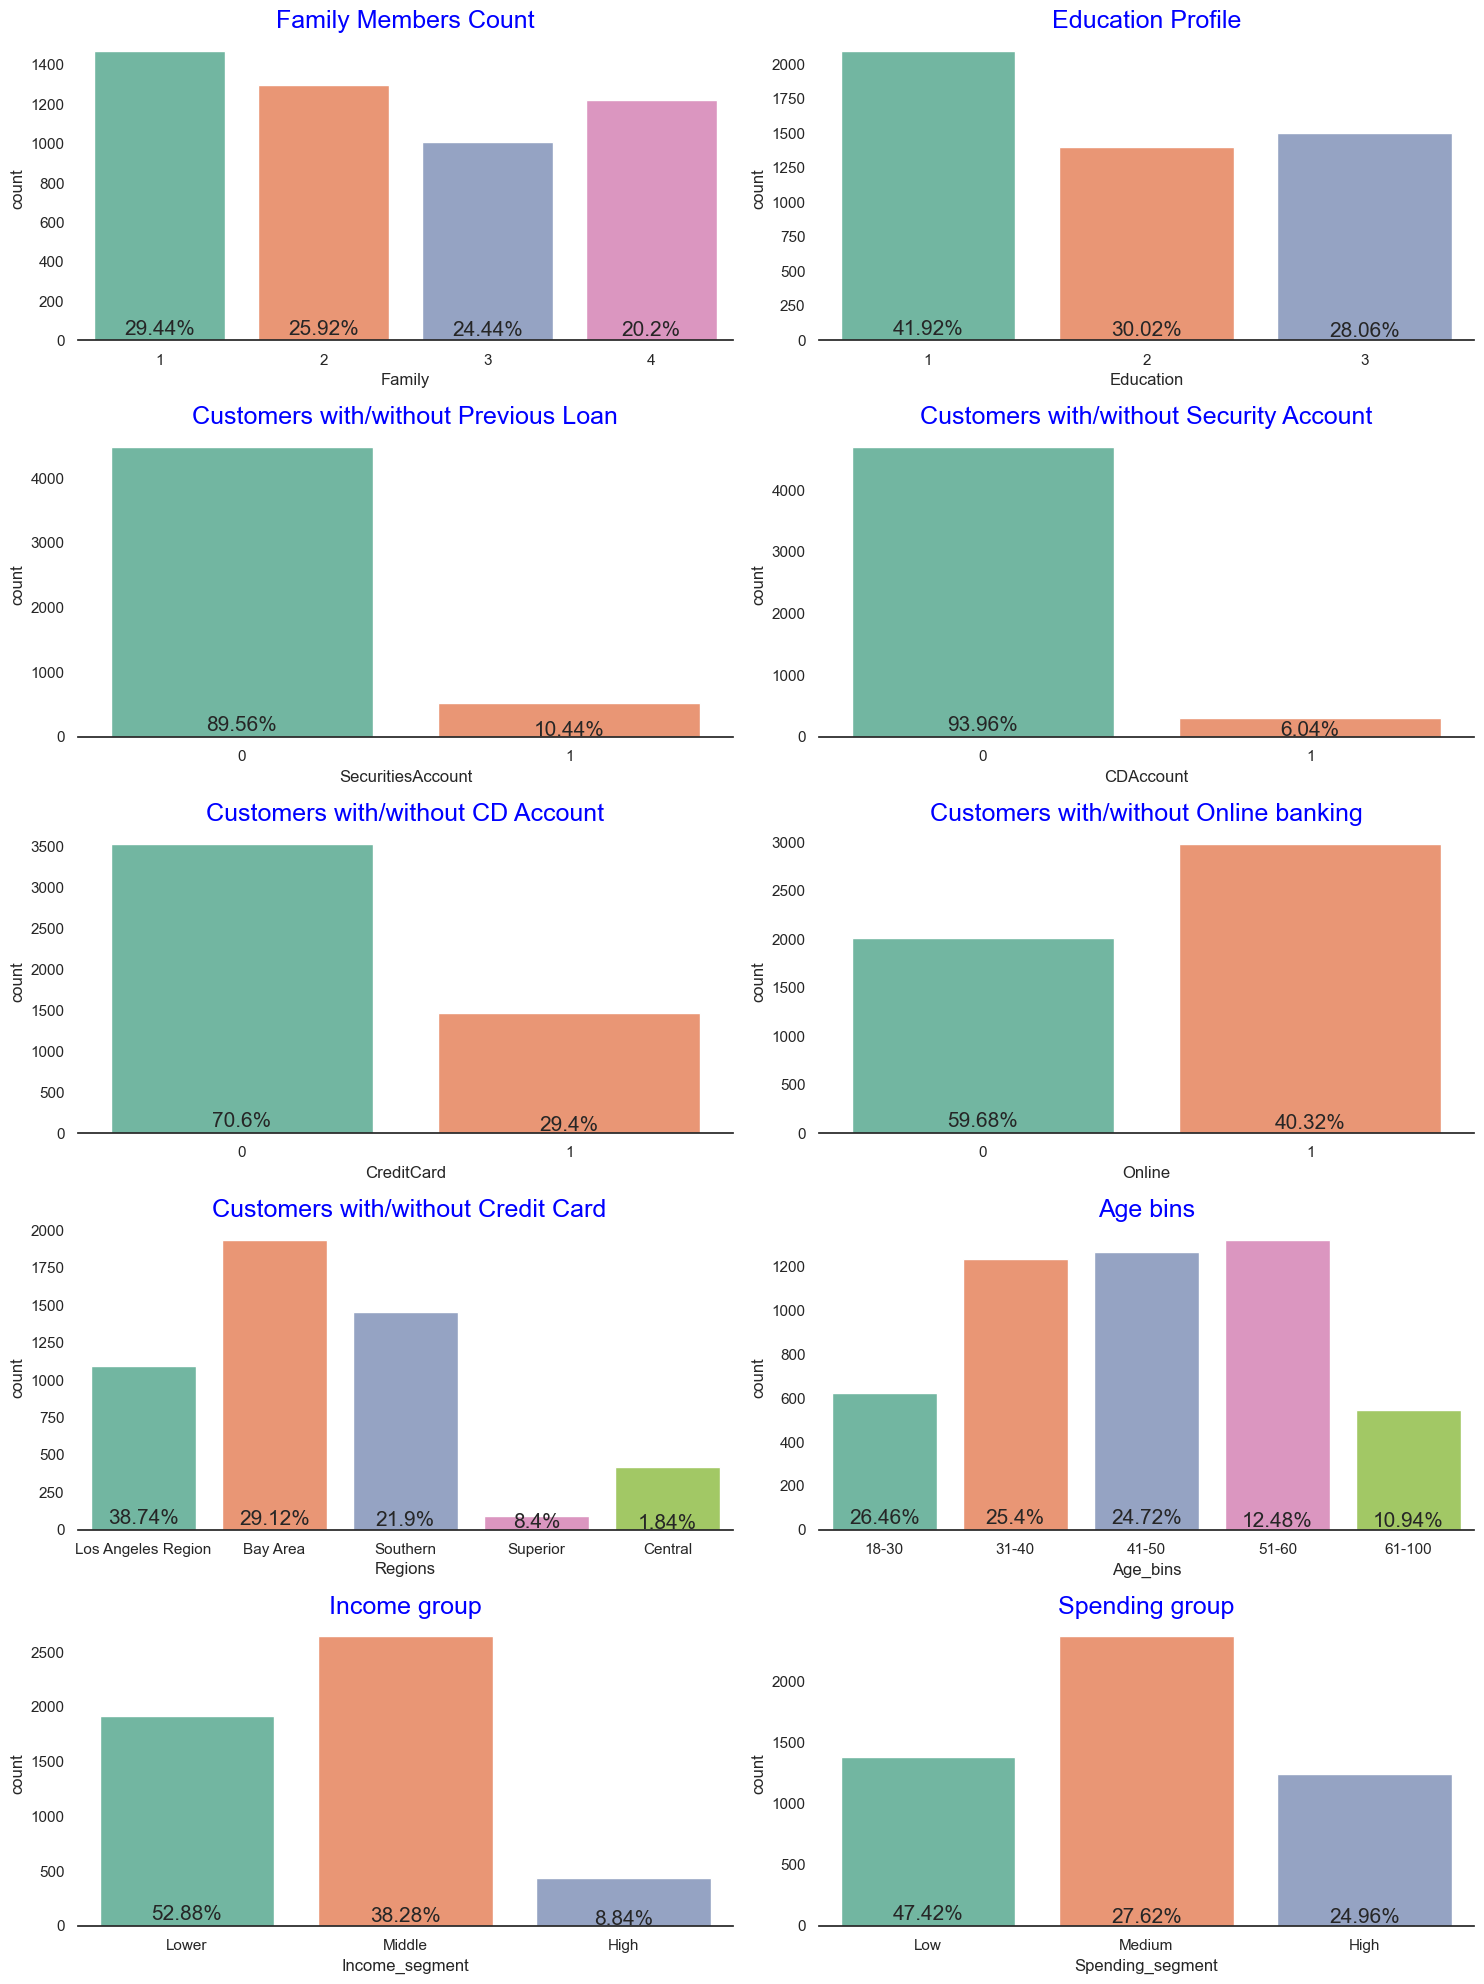

In [1037]:
plt.figure(figsize=(15,20))
titles=['Family Members Count','Education Profile','Customers with/without Previous Loan',
       'Customers with/without Security Account','Customers with/without CD Account',
       'Customers with/without Online banking',' Customers with/without Credit Card',
       'Age bins',"Income group",'Spending group']
for i,variable in enumerate(cat_cols):
    plt.subplot(5,2,i+1)
    sns.countplot(x=data[variable],data=data)
    sns.set_palette('Set2')
    sns.despine(top=True,right=True,left=True)
    plt.title(titles[i],size=18,color='blue')
    plt.tight_layout()
    perc=data[variable].value_counts(normalize=True)*100
    for x,y in enumerate(perc):
         plt.annotate(str(round(y,2))+'%', xy=(x, y), ha='center',fontsize='15')
    plt.tight_layout()

**Univariate Analysis-Countries**

In [659]:
data.groupby(['country','PersonalLoan'])['PersonalLoan'].count().unstack().head()

PersonalLoan,0,1
country,,
Alameda County,456,44
Butte County,17,2
Contra Costa County,73,12
El Dorado County,16,1
Fresno County,24,2


In [666]:
#plotting theis data via Crosstab

106

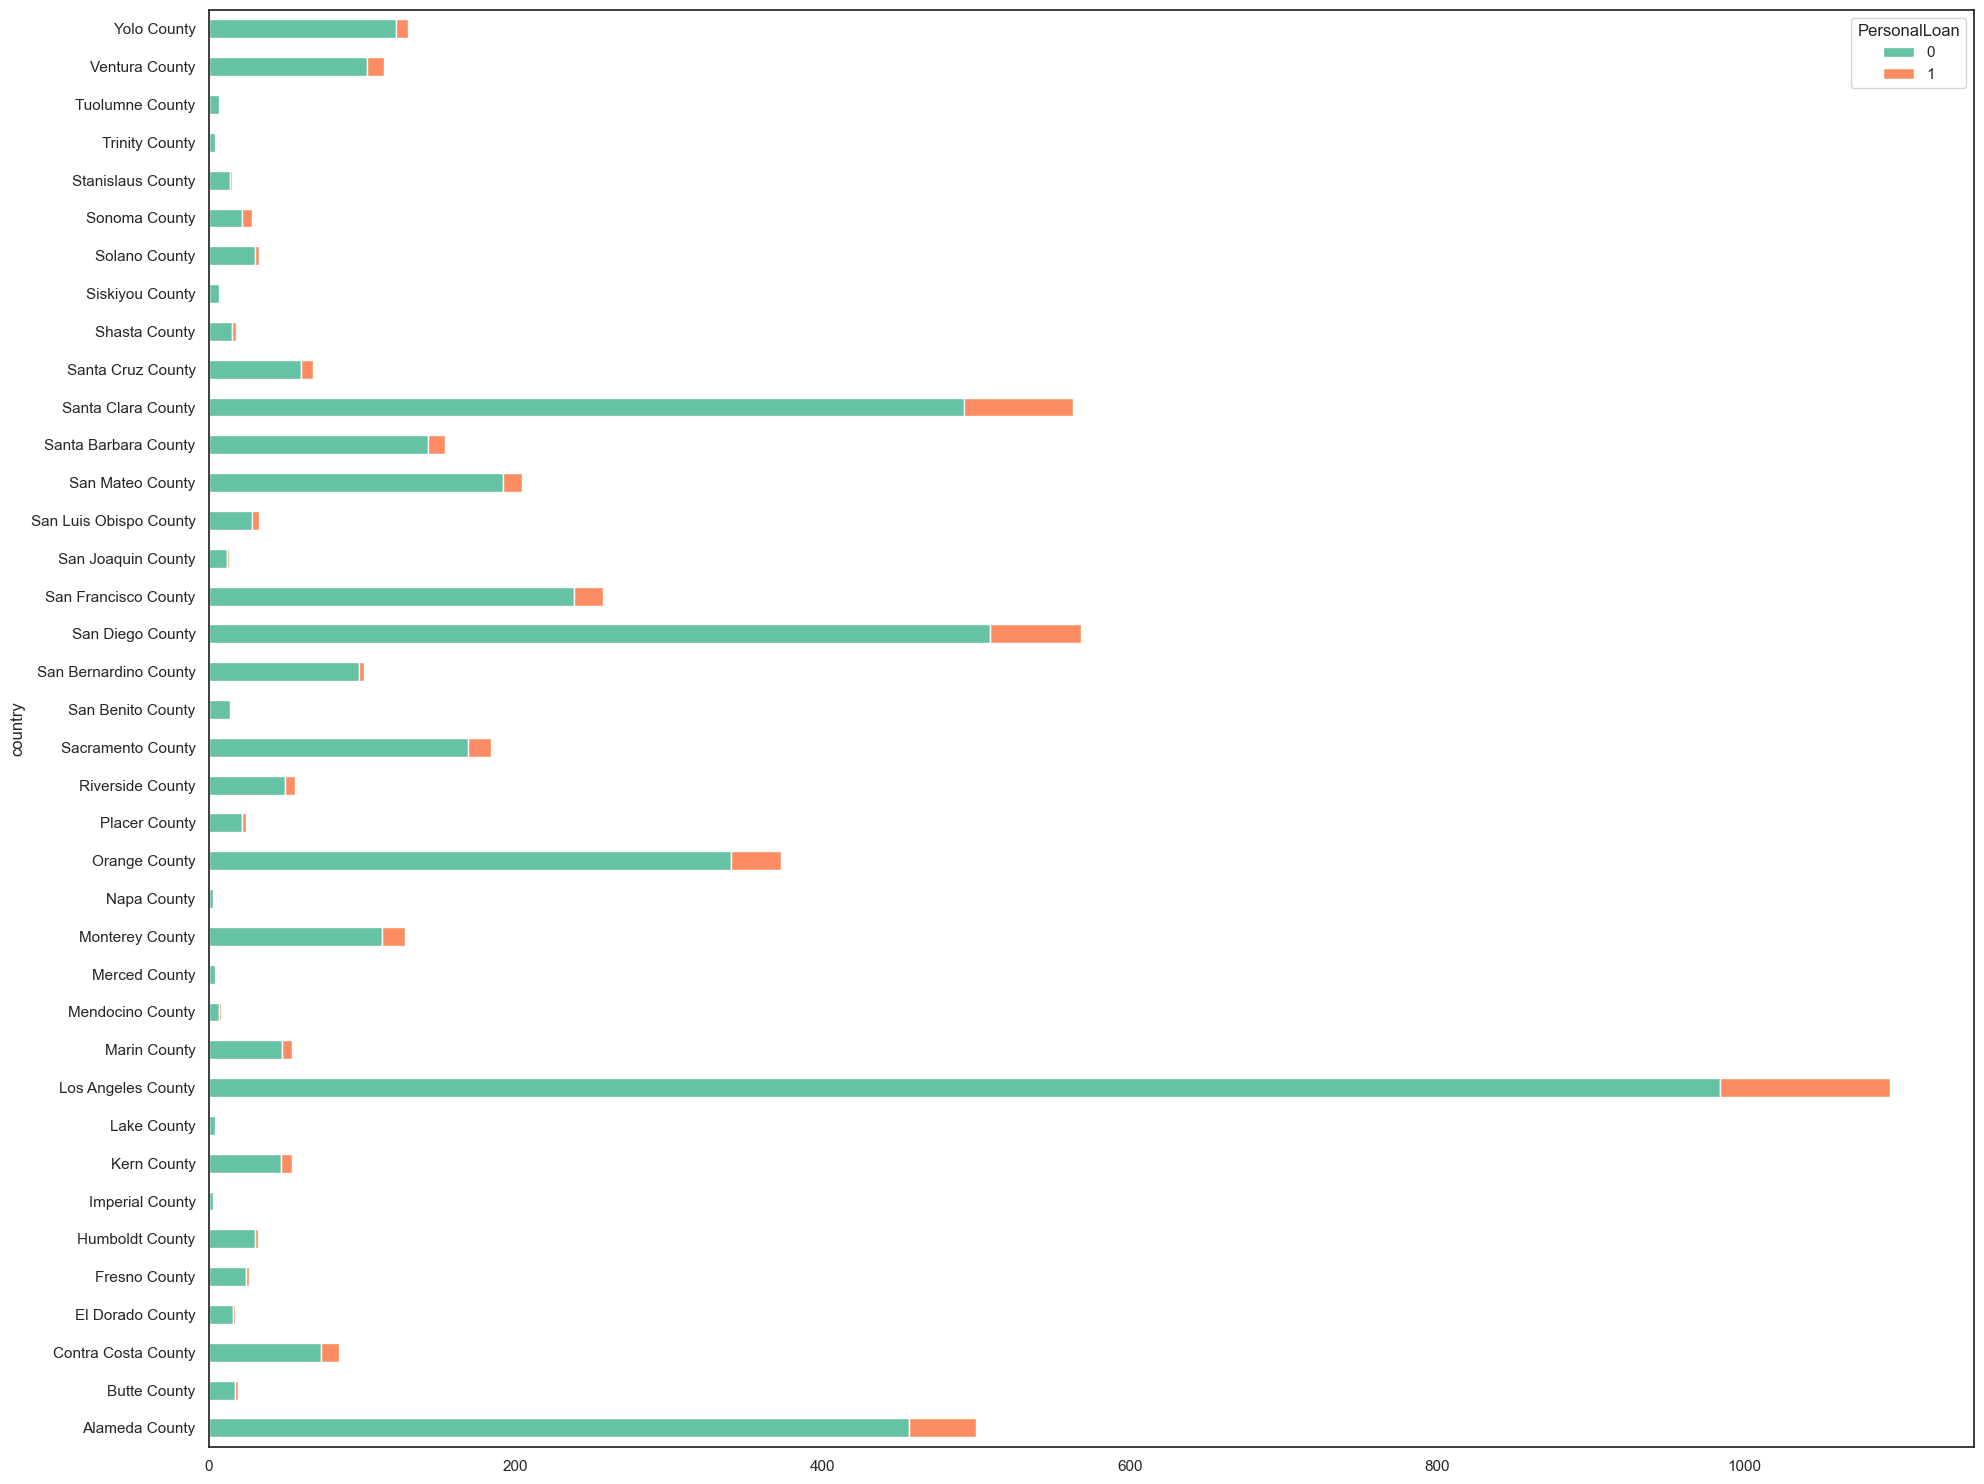

In [661]:
pd.crosstab(index=data.country,columns=data.PersonalLoan.sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=[20,15])
plt.tight_layout()

**Countries are an importnat features since loans vary a lot by countries.But countries are a lot in number and this level i too granular to analyze.Hence  we can map these regions using information from internet.**

Source used for below step - 
https://www.calbhbc.org/region-map-and-listing.html

In [662]:
counties_region_mapping = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

In [753]:
data['Regions']=data.country.map(counties_region_mapping)

In [754]:
data.Regions.nunique()

5

In [755]:
data.isna().sum().sum()

0

In [756]:
#hence no null

**Univariate Analysis-Region**

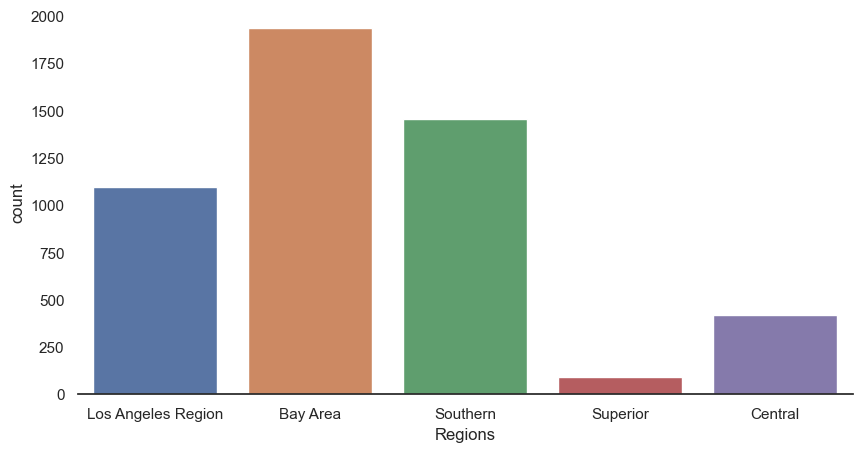

In [764]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Regions,data=data)
sns.despine(top=True,right=True,left=True)

* Bay Area has max customers followed by southern region
*Superior region has very customers

## EDA|Bivariate & Multivariate Analysis

### <center> Heatmap

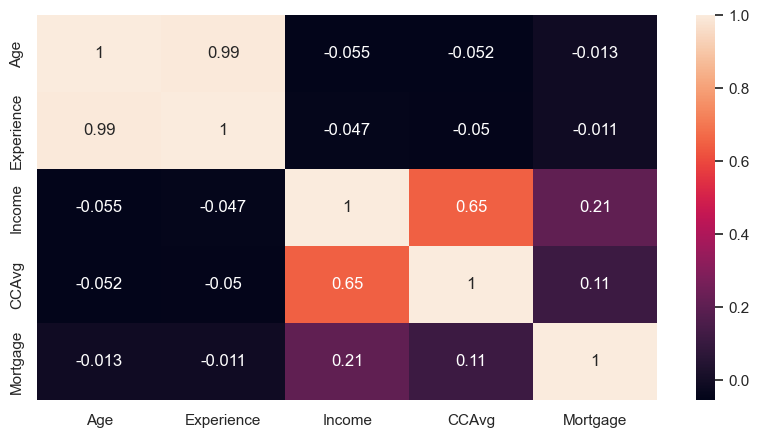

In [769]:
plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr(),annot=True,linecolor='white');

### Bivariate Analysis- Pairplot

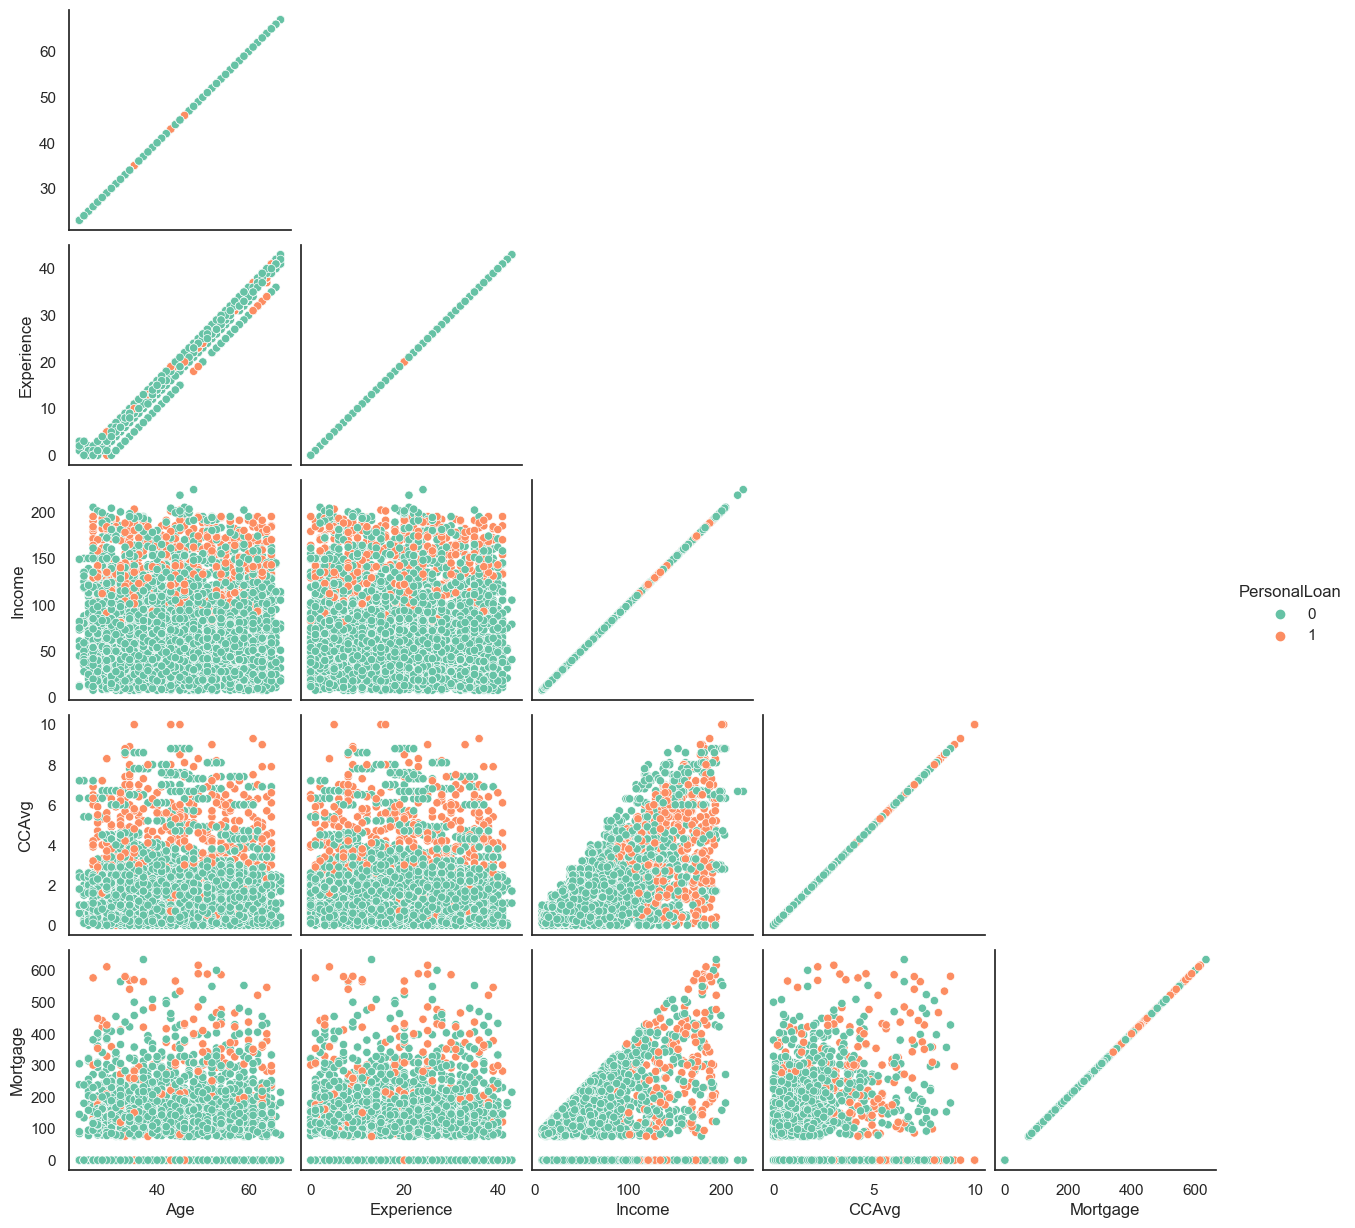

In [777]:
sns.pairplot(data=data,hue='PersonalLoan',diag_kind=None,palette='Set2',corner=True);

**heatmap and pairplot- insights**

* Age & Experience seems to be highly correlated
* Income and Average spendings are positively correlated
* Opposite to our intiution ,Mortage has very little correlation with income
* Higher income & higher spending customers are contributing a lot to potential buyers

**Bivariate Analysis - Boxplot comparison of Numerical features v/s Target**

In [784]:
num_f

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

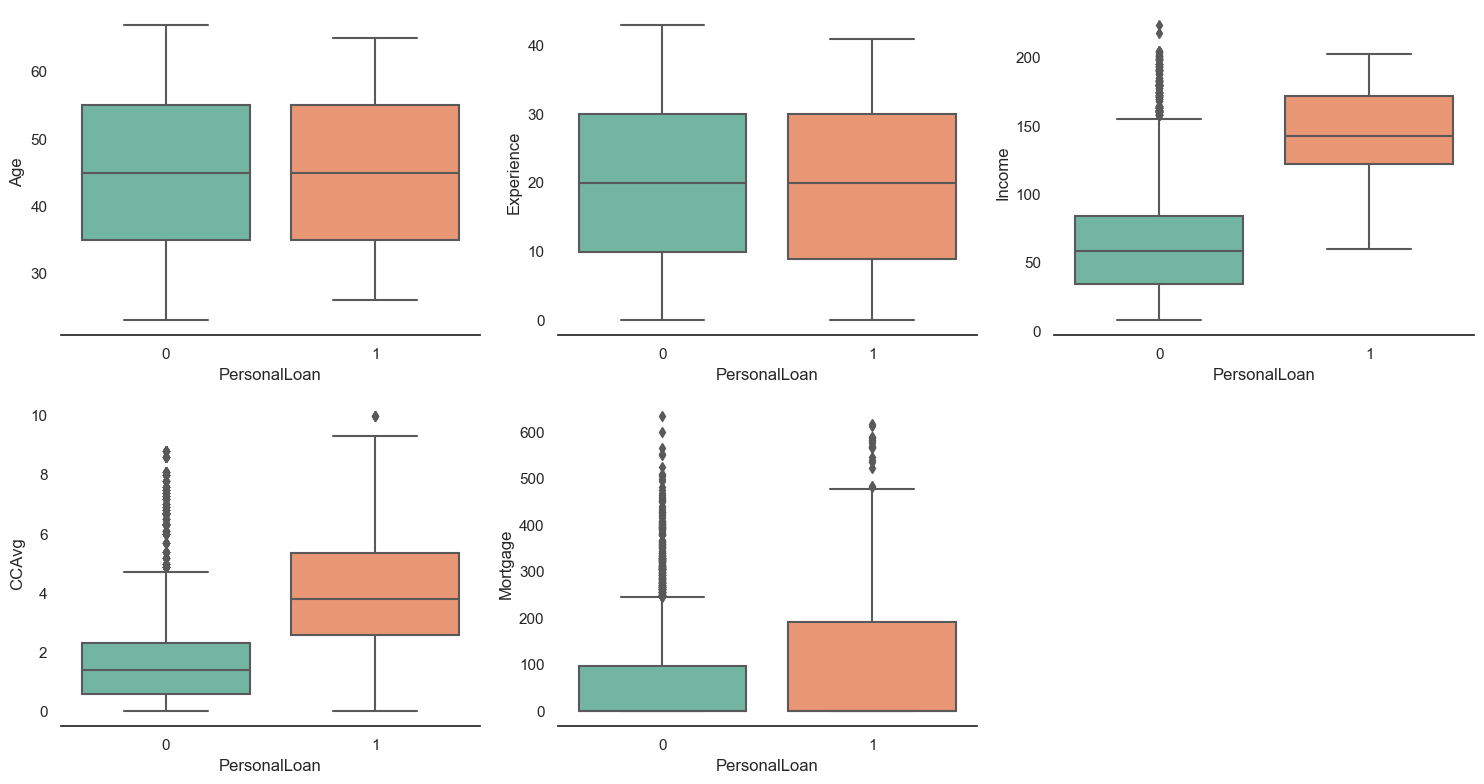

In [804]:
plt.figure(figsize=(15,8))
for i,variable in enumerate(num_f):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='PersonalLoan',y=data[variable],data=data,palette='Set2')
    sns.despine(left=True,right=True,top=True)
    plt.tight_layout()

*Insighst-* 
* Age & Target doesn't seem to impact our target variable
* Same story with the experience
* Higher income customer and heigher spendings are more likely to take the loan
* Those taking loans, have higher mortgage

**Bivariate Analsysis- Distplot comparision of CCAvg v/s Target**

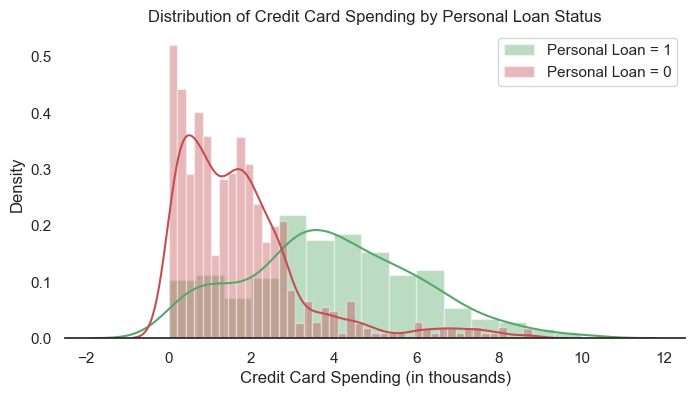

In [828]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.distplot(data[data.PersonalLoan==1].CCAvg, color='g', label='Personal Loan = 1')
sns.distplot(data[data.PersonalLoan==0].CCAvg, color='r', label='Personal Loan = 0')
plt.xlabel('Credit Card Spending (in thousands)')
plt.ylabel('Density')
plt.title('Distribution of Credit Card Spending by Personal Loan Status')
plt.legend()
sns.despine(top=True, right=True, left=True)
plt.show()


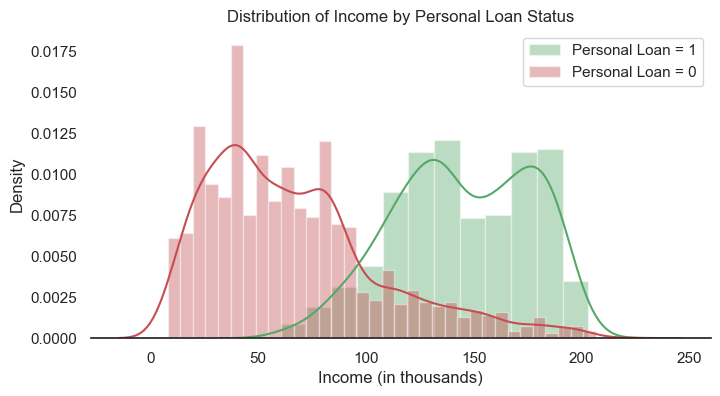

In [836]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.distplot(data[data.PersonalLoan==1].Income, color='g', label='Personal Loan = 1')
sns.distplot(data[data.PersonalLoan==0].Income, color='r', label='Personal Loan = 0')
plt.xlabel('Income (in thousands)')
plt.ylabel('Density')
plt.title('Distribution of Income by Personal Loan Status')
plt.legend()
sns.despine(top=True, right=True, left=True)


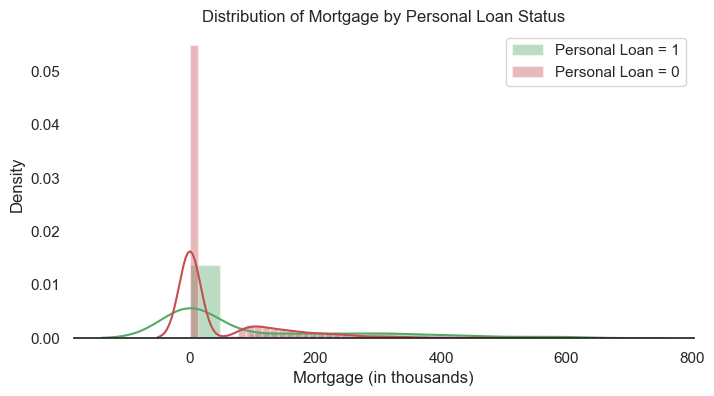

In [837]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.distplot(data[data.PersonalLoan==1].Mortgage, color='g', label='Personal Loan = 1')
sns.distplot(data[data.PersonalLoan==0].Mortgage, color='r', label='Personal Loan = 0')
plt.xlabel('Mortgage (in thousands)')
plt.ylabel('Density')
plt.title('Distribution of Mortgage by Personal Loan Status')
plt.legend()
sns.despine(top=True, right=True, left=True)


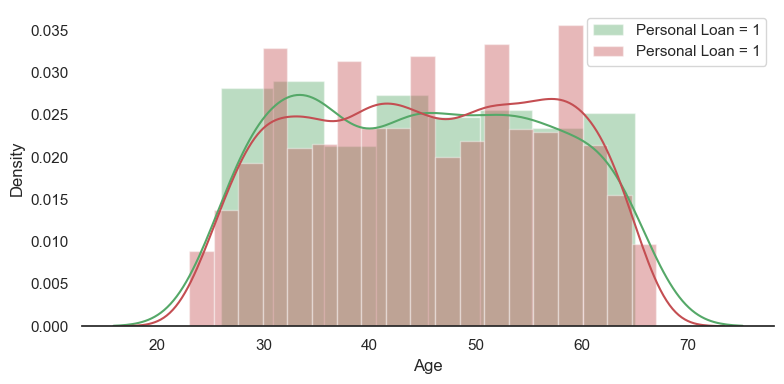

In [838]:
plt.figure(figsize=(8,4))
sns.distplot(data[data.PersonalLoan==1].Age,color='g',label='Personal Loan = 1')
sns.distplot(data[data.PersonalLoan==0].Age,color='r',label='Personal Loan = 1')
sns.despine(top=True,right=True,left=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout();

### Distplot Comparision Insight

* The distribution of personal_loan=1 is left skewed for income

**Bivariate Analysis| Stacked Bars- Categorical Features(s) v/s Target**

In [859]:
cat_cols=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Age_bins',
             'Income_segment','Spending_segment']
cat_f=cat_cols

PersonalLoan         0         1
Family                          
1             0.927310  0.072690
2             0.918210  0.081790
3             0.868317  0.131683
4             0.890344  0.109656
*******************
*******************
*******************
*******************


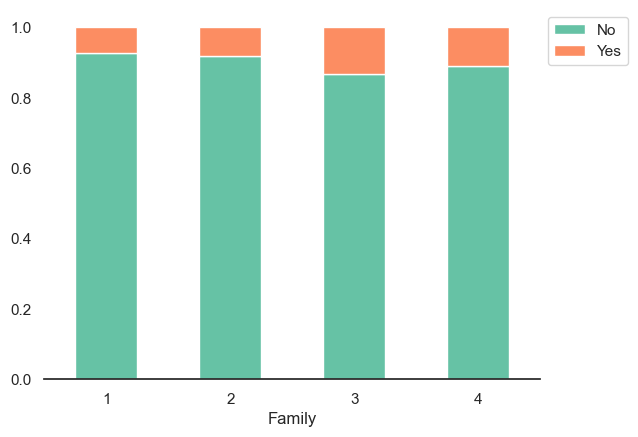

PersonalLoan         0         1
Education                       
1             0.955630  0.044370
2             0.870278  0.129722
3             0.863424  0.136576
*******************
*******************
*******************
*******************


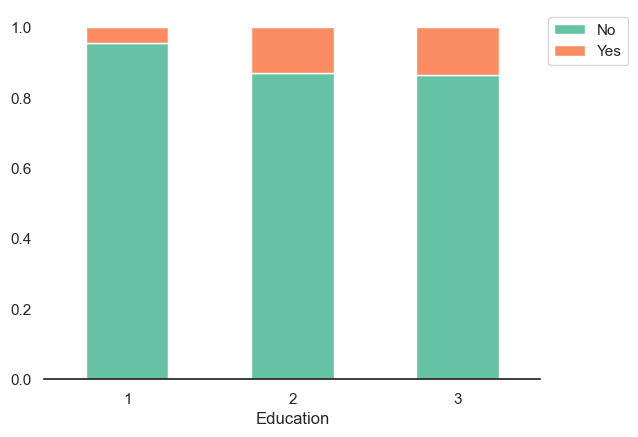

PersonalLoan              0         1
SecuritiesAccount                    
0                  0.906208  0.093792
1                  0.885057  0.114943
*******************
*******************
*******************
*******************


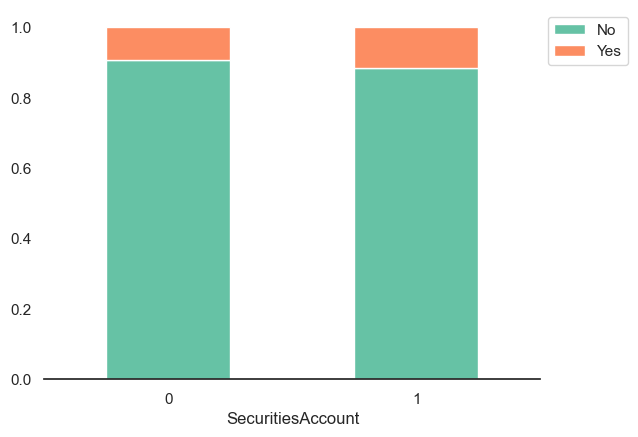

PersonalLoan         0         1
CDAccount                       
0             0.927629  0.072371
1             0.536424  0.463576
*******************
*******************
*******************
*******************


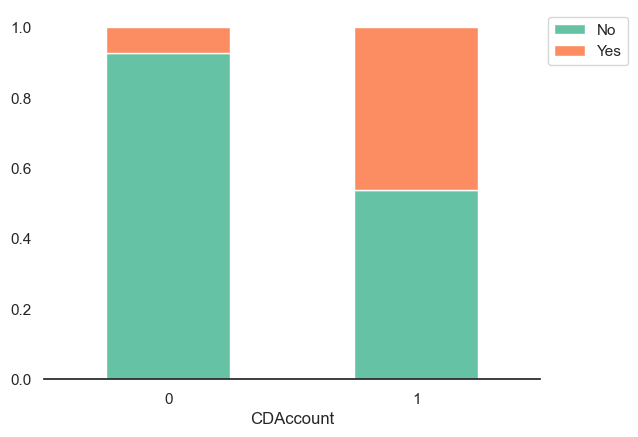

PersonalLoan         0         1
CreditCard                      
0             0.904533  0.095467
1             0.902721  0.097279
*******************
*******************
*******************
*******************


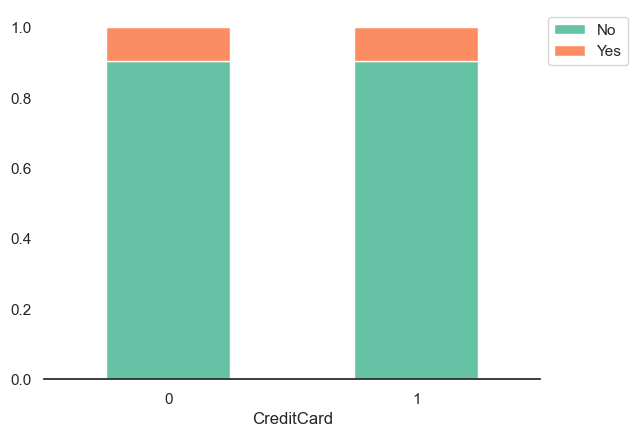

PersonalLoan        0        1
Online                        
0             0.90625  0.09375
1             0.90248  0.09752
*******************
*******************
*******************
*******************


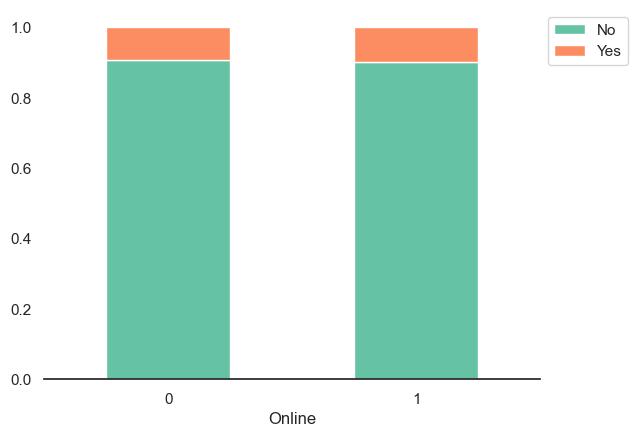

PersonalLoan               0         1
Regions                               
Bay Area            0.898813  0.101187
Central             0.928571  0.071429
Los Angeles Region  0.898630  0.101370
Southern            0.907280  0.092720
Superior            0.913043  0.086957
*******************
*******************
*******************
*******************


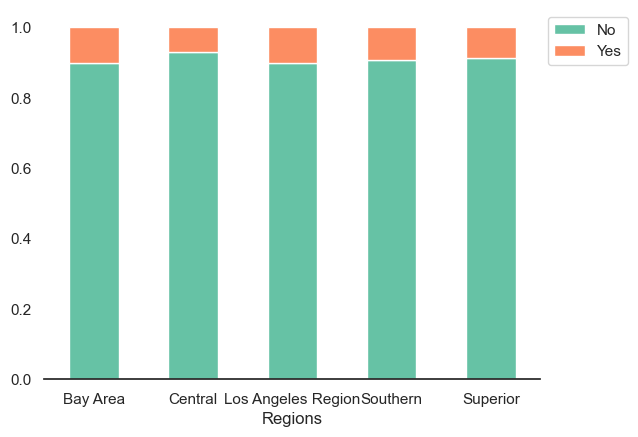

PersonalLoan         0         1
Age_bins                        
18-30         0.894231  0.105769
31-40         0.904531  0.095469
41-50         0.903937  0.096063
51-60         0.913076  0.086924
61-100        0.892139  0.107861
*******************
*******************
*******************
*******************


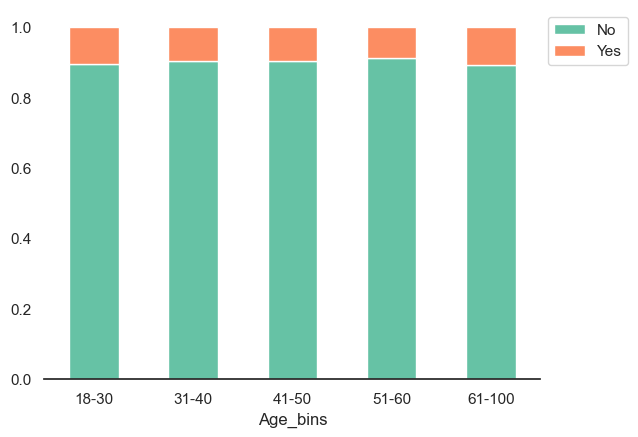

PersonalLoan           0         1
Income_segment                    
Lower           1.000000  0.000000
Middle          0.900908  0.099092
High            0.506787  0.493213
*******************
*******************
*******************
*******************


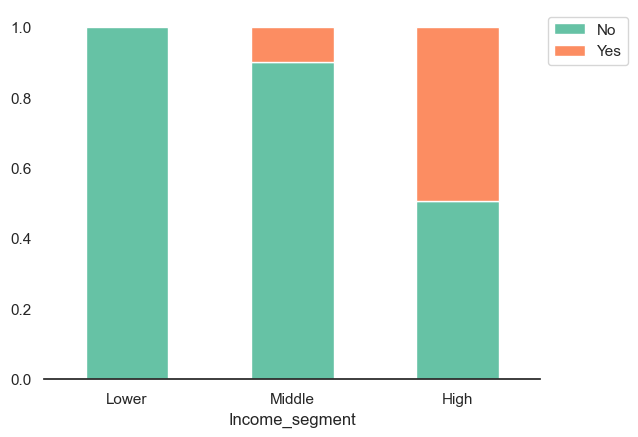

PersonalLoan             0         1
Spending_segment                    
Low               0.971760  0.028240
Medium            0.966681  0.033319
High              0.709936  0.290064
*******************
*******************
*******************
*******************


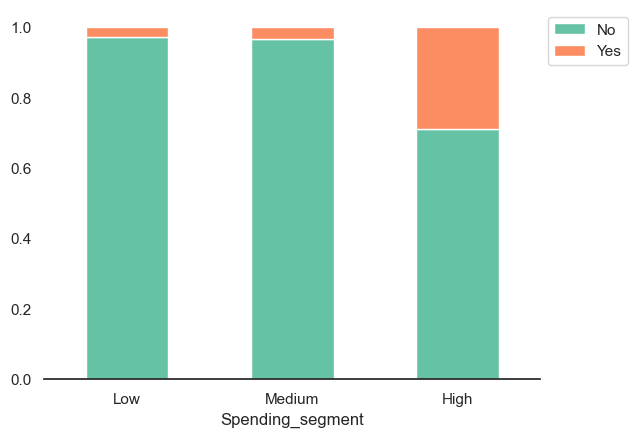

In [972]:
for i,variable in enumerate(cat_f):
    df=pd.crosstab(data[variable],data['PersonalLoan'],normalize='index')
    print(df)
    print('*******************')
    print('*******************')
    print('*******************')
    print('*******************')
    sns.set_palette('Set2')
    df.plot(kind='bar',stacked=True)
    plt.xticks(rotation='0')
    sns.despine(left=True,right=True,top=True)
    plt.legend(labels=["No","Yes"],bbox_to_anchor=(1,1))
    plt.show();

### Multivariate Analysis

*Multivariate Analysis|Income & Average spend across Target*

<Figure size 600x1000 with 0 Axes>

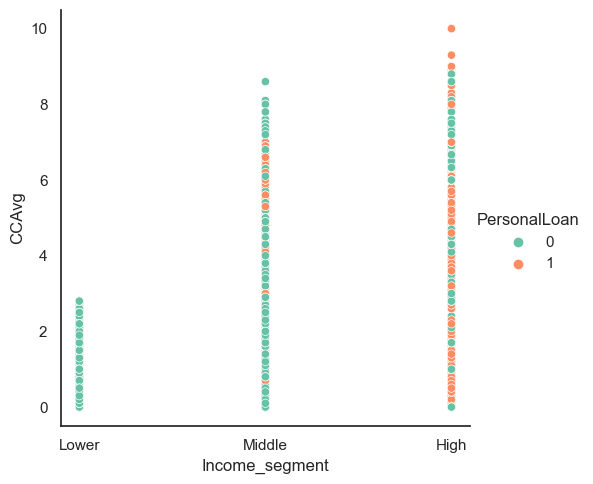

In [981]:
plt.figure(figsize=(6,10))
sns.relplot(x='Income_segment',y='CCAvg',hue='PersonalLoan',data=data);

**Multivariate Analysis| Income & Mortgage- across Target**

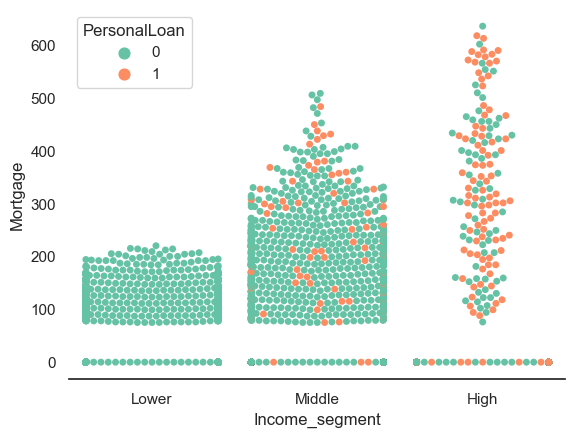

In [994]:
sns.swarmplot(x='Income_segment',y='Mortgage',hue='PersonalLoan',data=data)
sns.despine(top=True,right=True,left=True)

##### Multivariate Analysis |  Income & Education - across Target

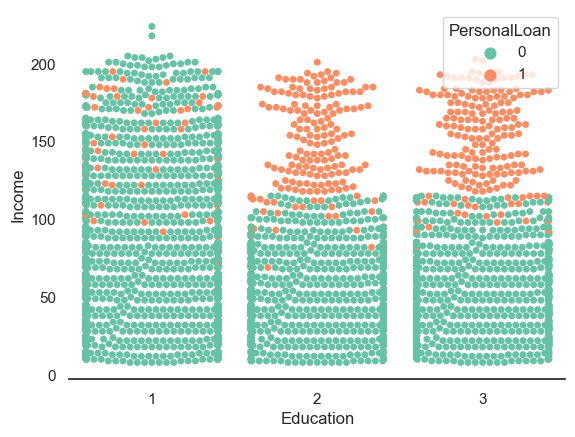

In [989]:

sns.swarmplot(x='Education',y='Income',hue='PersonalLoan',data=data)
sns.despine(top=True,right=True,left=True)
plt.legend(labels=["No","Yes"],title="Borrowed Loan ? ",
           bbox_to_anchor=(1,1), colors=["blue", "green"])

**Multivariate Analysis| Income V/S Agebins V/S Education - across Targets (0,1)**

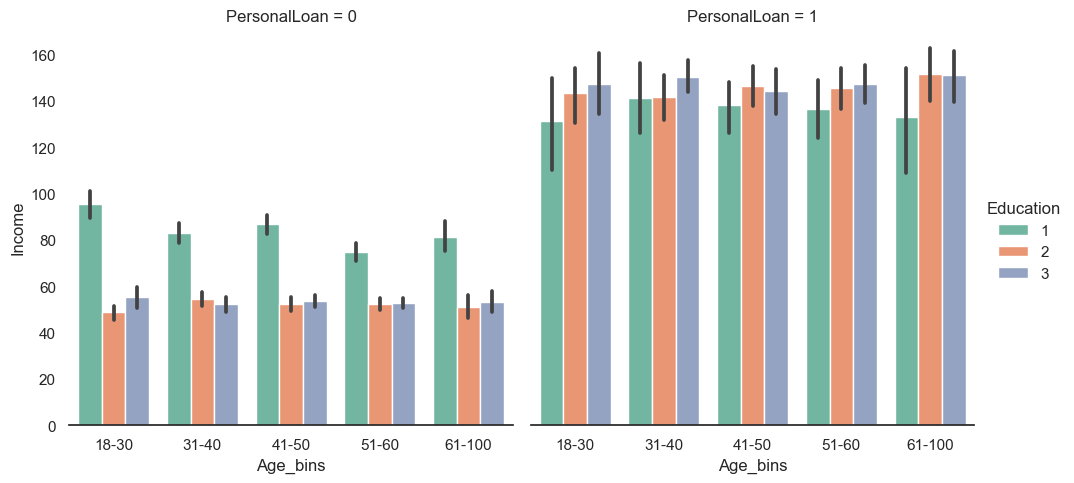

In [1003]:
sns.catplot(x='Age_bins',y='Income',hue='Education',kind='bar',data=data,col='PersonalLoan');
sns.despine(top=True,right=True,left=True);

**Multivariate Analysis| Education V/S Average_spend - across Targets (0,1)**

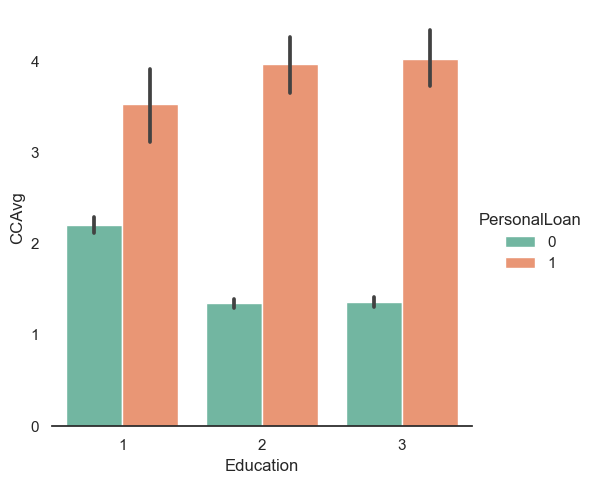

In [1017]:
sns.set_palette('Set2')
sns.catplot(x='Education',y='CCAvg',hue='PersonalLoan',kind='bar',data=data);
sns.despine(top=True,right=True,left=True);

**Multivariate Analysis | insight**

* Higher income is a major factor in detemining the potential loan borrowers.
* HeigherMortgage also drive loan to an an extent.
* Higher average spends are also linked to loan borrowers.
* Income,Average spends and mortgage all seems to be correlated.

**EDA|Checking imbalance in Target column**

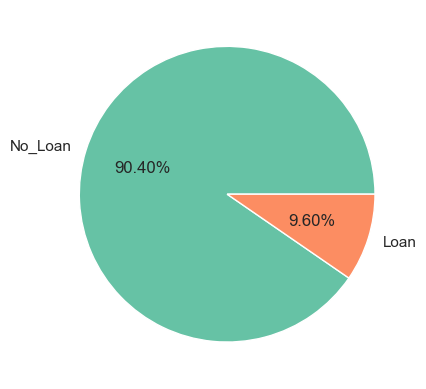

In [1026]:
plt.pie(x=data.PersonalLoan.value_counts(),autopct='%1.2f%%',labels=['No_Loan','Loan'],labeldistance=1.1);

**The data seems be imbalanced with respect to Target variable,which is not a good indication.It might create a baised model,or model that is more accurate for No_loan**

We will use SMOTE later to rectify this

## <center> Insight Summary

**Knowing data :**

* Target column is PersonalLoan(categorical datatype).
* We have following continous features- Age, Experience,Income,Mortgage,CCAvg.
* No missing values in our data now.

**Data Cleaning :**

* Experience had some -ve values which we treated by taking absolutes.
* In order to reduce granulaity,Zipcodes were mapped to countries using Zipcode library.And Countries were further mapped to Regions using information fro internet.
* Age,Income & Spendings were used to derive corresponding categories for better analysis.

**Insights :**

* Higher Income, Spend and Mortgages are indicator of loan borrowers customer segment. 
* Family size of 3 came out to be the best in terms of loan customers.
* Education level 2: Graduate and 3: Advanced/Professional  were also good indicators of our desired segment.
* Certificate of deposit is a slightly positive indicator for a loan borrower.
* Customers with other bank Credit card showed no corelation with loans.
* LosAngeles and Bay region contribute maximum towards loan borrowers.
* All age segments are equally likely for loan customers.
* It can be inferred that the more income you have, the more you tend to spend and live a "larger than life" lifestyle.

**Tenatative profiling of a customer**

* Most Probable Borrowers: Customer with high income,spending and mortgage.Also,which have a security deposit.
* Likel Borrowers: Customers in medium income range,average spends and mortgages.
* Unlikely Borrowers: Rest of the customers

**Next step for data-preprocessing**

* Since we already know the correlations, based on that Experience can be dropped as it is very highly correlated to Age.
* We can also drop following logical duplicate features which we derived from EDA:-> Experience,Country,Zipcode,Agebins,Income_segment & Spending_segmen 

## <center> Feature Engineering

###  Feature Engineering | Dropping Unnecessary or duplicate features

In [1124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  country            5000 non-null   category
 14  Age_bins           5000 non-null   category
 15  Income_segment     5000 non-null   category
 16  Spendi

In [1126]:
# As per EDA, dropping columns which are either correlated with some feature or are duplicates
data.drop(columns=["Age_bins", "ZIPCode","country",'Experience','Income_segment','Spending_segment'], inplace=True)

In [1127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Income             5000 non-null   int64   
 2   Family             5000 non-null   category
 3   CCAvg              5000 non-null   float64 
 4   Education          5000 non-null   category
 5   Mortgage           5000 non-null   int64   
 6   PersonalLoan       5000 non-null   category
 7   SecuritiesAccount  5000 non-null   category
 8   CDAccount          5000 non-null   category
 9   Online             5000 non-null   category
 10  CreditCard         5000 non-null   category
 11  Regions            5000 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 230.6+ KB


**Creating dummies**

In [1160]:
data[data.columns[data.columns.isin(cat_f1)]]

,Family,Education,SecuritiesAccount,CDAccount,Online,CreditCard,Regions
0,4,1,1,0,0,0,Los Angeles Region
1,3,1,1,0,0,0,Los Angeles Region
2,1,1,0,0,0,0,Bay Area
3,1,2,0,0,0,0,Bay Area
4,4,2,0,0,0,1,Los Angeles Region
...,...,...,...,...,...,...,...
4995,1,3,0,0,1,0,Southern
4996,4,1,0,0,1,0,Southern
4997,2,3,0,0,0,0,Southern
4998,3,2,0,0,1,0,Los Angeles Region


In [1162]:
# here we can see that our 4 cat_f are already in binary;namely 
# SecuritiesAccount,CDAccount,Online,CreditCard

In [1163]:
X=data.drop('PersonalLoan',axis=1)
Y=data['PersonalLoan']

In [1164]:
X=pd.get_dummies(data=X,columns=['Regions','Education'],drop_first=True)

**Train_Test_Split**

In [1166]:
from sklearn.model_selection import train_test_split

In [1168]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

**Standardization**

In [1170]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

X_train_std=pd.DataFrame(X_train_std,columns=X_train.columns)
X_test_std=pd.DataFrame(X_test_std,columns=X_test.columns)


# <center>  Logistic Regression

**There can be two types of errors our model can make**

1. Type 1 Error : Model predicts customer will opt for loan but he/she doesn't(Loss of Resources)
2. Type 2 Error : Model predicts customer will not opt for loan but he/she actually wanted to. (Opportunity loss)

**Which of the above is more important**

* The main objective of this project is to acquire more customer,hence TYPE-2 error is more critical.It is okay if the marketing budget is spent somewhat incorrectly but we should not miss out the opportunity against a  potential customer.
* For this reason, Recall is our right matrix to predict performance.Accuracy could have been used, but since our data is highly baised,it would not be a very good choice.

In [1235]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(class_weight='weighted')
model=log_reg.fit(X_train_std,y_train)

pred_train=model.predict(X_train_std)
pred_test=model.predict(X_test_std)

In [1236]:
# When we set class_weight='weighted' in LogisticRegression, 
# the algorithm automatically adjusts the weight of each class 
# to be inversely proportional to the class frequencies in the input data.
# This means that the algorithm will give more importance to the minority class
# during training, which can help improve the model's ability to predict the minority class.

# However, it's important to note that using class_weight='weighted' 
# may not always be as effective as using SMOTE, 
# especially if the class imbalance is severe.
# In such cases, using a combination of both techniques may be 
# necessary to achieve better results.

In [1237]:
# importing confusion matrix
from sklearn.metrics import confusion_matrix

train_confusion_matrix=confusion_matrix(y_train,pred_train)
test_confusion_matrix=confusion_matrix(y_test,pred_test)

In [1238]:
display(train_confusion_matrix,test_confusion_matrix)

array([[3580,   36],
       [ 130,  254]], dtype=int64)

array([[893,  11],
       [ 29,  67]], dtype=int64)

**Checking ACCURACY,PRECISION,RECALL,F-1 SCORE**

In [1239]:
from sklearn.metrics import classification_report

In [1240]:
training_report=classification_report(y_train,pred_train)
test_report=classification_report(y_test,pred_test)

In [1241]:
print(training_report)

print('********************************************************')
print(test_report)
print('********************************************************')
print("Suport indicates no of columns in each case")

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3616
           1       0.88      0.66      0.75       384

    accuracy                           0.96      4000
   macro avg       0.92      0.83      0.87      4000
weighted avg       0.96      0.96      0.96      4000

********************************************************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.86      0.70      0.77        96

    accuracy                           0.96      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.96      0.96      0.96      1000

********************************************************
Suport indicates no of columns in each case


**The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.**

## Using SMOTE algorithm

In [1263]:
print("Before oversampling , count of label 0 in training : {0}".format(sum(y_train==0)))
print("Before oversampling , count of label 1 in training : {0}".format(sum(y_train==1)))

Before oversampling , count of label 0 in training : 3616
Before oversampling , count of label 1 in training : 384


In [1272]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

X_train_res,y_train_res=sm.fit_resample(X_train_std,y_train)

In [1275]:
print("After oversampling , count of label 0 in training : {0}".format(sum(y_train_res==0)))
print("After oversampling , count of label 1 in training : {0}".format(sum(y_train_res==1)))

After oversampling , count of label 0 in training : 3616
After oversampling , count of label 1 in training : 3616


In [1276]:
# Again making maodel with the non baised data. 

In [1280]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(class_weight='weighted')
model=log_reg.fit(X_train_res,y_train_res)

pred_train=model.predict(X_train_res)
pred_test=model.predict(X_test_std)

In [1281]:
# importing confusion matrix
from sklearn.metrics import confusion_matrix

train_confusion_matrix=confusion_matrix(y_train_res,pred_train)
test_confusion_matrix=confusion_matrix(y_test,pred_test)

In [1282]:
display(train_confusion_matrix,test_confusion_matrix)

array([[3298,  318],
       [ 275, 3341]], dtype=int64)

array([[827,  77],
       [  8,  88]], dtype=int64)

In [1285]:
from sklearn.metrics import classification_report

In [1286]:
training_report=classification_report(y_train_res,pred_train)
test_report=classification_report(y_test,pred_test)

In [1287]:
print(training_report)

print('********************************************************')
print(test_report)
print('********************************************************')
print("Suport indicates no of columns in each case")

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3616
           1       0.91      0.92      0.92      3616

    accuracy                           0.92      7232
   macro avg       0.92      0.92      0.92      7232
weighted avg       0.92      0.92      0.92      7232

********************************************************
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       904
           1       0.53      0.92      0.67        96

    accuracy                           0.92      1000
   macro avg       0.76      0.92      0.81      1000
weighted avg       0.95      0.92      0.92      1000

********************************************************
Suport indicates no of columns in each case


# Recall value of minority class has improved to 92 %